<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0425/40_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# 워드 클라우드는 한글폰트 지원안함 >> 한글 폰트 필요

import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
# 이미지 데이터 불러오고 처리하는 라이브러리

In [4]:
# 저번 시간에 뉴스 가져온 것 그대로 함
total = []

url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=27&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=1")
html = BeautifulSoup(url.text)

news = html.find('ul', class_='list_news').find_all('li',class_='bx')

for i in news:
    title = i.find('a', class_='news_tit').text # .text로 텍스트 화 함
    contents= i.find('a', class_='api_txt_lines dsc_txt_wrap').text

    total.append([title, contents])
total

[['日경산상, 韓화이트리스트 복원 여부에 "한국 자세 신중히 파악"',
  '"결론이 있지 않아서 책임 있는 판단을 할 것" 박상현 특파원 = 니시무라 야스토시 일본 경제산업상은 25일 한국을 \'화이트리스트\'(수출 심사 우대국)에 복귀시키는 것과 관련해 "한국 측 자세를 신중하게 지켜보겠다"고...'],
 ['[단독] \'캄보디아 사망\' 故서세원, 한국 이송된다 "절차 밟는 중…부검할 것"',
  '캄보디아에서 사망한 고(故) 코미디언 겸 사업가 서세원의 시신이 한국 이송된 뒤 부검 절차를 밟는다. 캄보디아 현지 의료관계자는 25일 오후 뉴스1과 통화에서 "서세원씨의 현지 장례식은 끝났고, 한국에서의 장례식을...'],
 ['백악관 "반도체지원법으로 한국기업 혜택"',
  '커비 조정관은 한·미 정보동맹 강화와 관련해선 "동맹과의 방위를 강화하는 차원에서 한국과 정보 공유를... 커비 조정관은 한국 정부의 우크라이나에 대한 군사적 지원 가능성에 대해선 "한국이 결정할 문제"라고 답했다....'],
 ['尹, 넷플릭스CEO 접견으로 첫 일정 “25억불 한국 투자”',
  '이 자리에서 서랜도스 CEO는 향후 4년간 한국 드라마·영화·리얼리티쇼 등 K 콘텐츠에 25억 달러를... 서랜도스 CEO도 “25억 달러를 한국에 투자하기로 했다”며 “앞으로 4년간 한국 드라마, 영화, 리얼리티 쇼의 창작을...'],
 ['김건희 여사도 넷플릭스 관계자 만났다…“한국 신인 발굴” 당부',
  '접견해 한국 신인 발굴을 당부했다. 이도운 대변인은 서면브리핑을 통해 김 여사가 24일(현지시간) 워싱턴 DC에서 벨라 바자리아 넷플릭스 COO와 만났다고 밝혔다. 김 여사는 이날 접견에서 “한국 문화가 전 세계적으로...'],
 ['1분기 바닥 탈출한 한국경제, 하반기 반등 계기 마련할까',
  '한국 경제가 바닥을 찍고 반등의 계기를 마련했습니다. 지난해 4분기 2년 6개월 만에 역성장을 경험한 우리... 오늘(25일) 한국은행에 따르면 올해 1분기 실질 국내총생산(GDP)

In [ ]:
total = []

for n in range(1, 3992, 10):
     # 네이버 뉴스 전체 페이지 가져오려고 함(1부터 3992전까지 10배수로)
     # 참고 : 네이버는 400페이지밖에 제공 안함
    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=58&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    # url의 맨마지막 =1" 부분을 ={}".format(n)으로 바꿔줘야 n값이 변경될 때 페이지 변경 가능
    html = BeautifulSoup(url.text)

    news = html.find('ul', class_='list_news').find_all('il',class_='bx')

    for i in news:
        title = i.find('a', class_='news_tit').text 
        content = i.find('a', class_= 'api_txt_lines dsc_txt_wrap').text 
        total.append([title,content])

    time.sleep(1) # for문이 400번 돌아가니 1초마다 쉬어줘야 서버 과부하 방지

In [ ]:
from tqdm import tqdm # for문 언제 끝나는지 확인해주는 라이브러리

total = []

for n in tqdm(range(1, 3992, 10)):

    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=58&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)

    news = html.find('ul', class_='list_news').find_all('il',class_='bx')

    for i in news:
        title = i.find('a', class_='news_tit').text 
        content = i.find('a', class_= 'api_txt_lines dsc_txt_wrap').text 
        total.append([title,content])

    time.sleep(1) # for문이 400번 돌아가니 1초마다 쉬어줘야 서버 과부하 방지

100%|██████████| 400/400 [13:08<00:00,  1.97s/it]


In [5]:
from tqdm import tqdm 

total = []

for n in tqdm(range(1, 3992, 10)):

    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=27&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)

    news = html.find('ul', class_='list_news').find_all('li',class_='bx')

    for i in news:
        title = i.find('a', class_='news_tit').text
        contents= i.find('a', class_='api_txt_lines dsc_txt_wrap').text

        total.append([title, contents])

    time.sleep(1) 

100%|██████████| 400/400 [14:52<00:00,  2.23s/it]


In [6]:
len(total)

4000

In [7]:
df = pd.DataFrame(total, columns = ['제목', '요약'])
df

,제목,요약
0,"日경산상, 韓화이트리스트 복원 여부에 ""한국 자세 신중히 파악""","""결론이 있지 않아서 책임 있는 판단을 할 것"" 박상현 특파원 = 니시무라 야스토시..."
1,"[단독] '캄보디아 사망' 故서세원, 한국 이송된다 ""절차 밟는 중…부검할 것""",캄보디아에서 사망한 고(故) 코미디언 겸 사업가 서세원의 시신이 한국 이송된 뒤 부...
2,"백악관 ""반도체지원법으로 한국기업 혜택""","커비 조정관은 한·미 정보동맹 강화와 관련해선 ""동맹과의 방위를 강화하는 차원에서 ..."
3,"尹, 넷플릭스CEO 접견으로 첫 일정 “25억불 한국 투자”",이 자리에서 서랜도스 CEO는 향후 4년간 한국 드라마·영화·리얼리티쇼 등 K 콘텐...
4,김건희 여사도 넷플릭스 관계자 만났다…“한국 신인 발굴” 당부,접견해 한국 신인 발굴을 당부했다. 이도운 대변인은 서면브리핑을 통해 김 여사가 2...
...,...,...
3995,아반떼 제치더니 '미국서 일냈다'…한국산 소형 SUV 돌풍,한국에서 생산되는 제너럴모터스(GM) 산하 브랜드 쉐보레 트레일블레이저와 뷰익 앙코...
3996,한국 車 판매량 4.4%↓..중국 車는 두 자릿수 성장,21일 한국자동차산업협회(KAMA)가 발표한 ‘2022년 해외 주요 자동차시장 및 ...
3997,20년 간 1200% 수익률…'한국형 가치투자'로 수익낸 비결은?,대표는 '한국형 가치투자'의 전도사로 통한다. 상따(상한가 따라잡기)나 차트 매매 ...
3998,"'빚내서 투자' 20조 돌파… 한국투자증권, 예탁증권담보 대출 문 닫는다",신용거래융자 잔고가 20조원을 돌파한 가운데 한국투자증권은 예탁증권담보 대출 문을 ...


In [8]:
import re
# 한글 데이터만 가져오기
text = '' # text 라는 빈 문자열 가져오기

for i in total:
    text += i[0] # total의 i의 0번째 (i[0]) : 제목, text에 제목을 더해줌
    text += '\n' # 엔터키(줄바꿈)
    text += i[1] # total의 i의 1번째 (i[1]) : 요약, text에 요약을 더해줌
    text += '\n'  # 엔터키(줄바꿈)
    # 엄청난 양의 데이터가 마치 한 문장처럼 저장될 것

len(text) # 데이터 양 확인

621377

In [9]:
box = re.findall("[가-힣]{2,}", text)
# re.findall("[가-힣]{2,}", text) 
# >> re.findall(): 해당하는 값을 찾아라
# [가-힣] : 모든 한글
# {2,} : 2글자 이상 부터 계속
# text : 텍스트로 보여줌
len(box) # 몇개의 단어가 들어있는지 개수 알려줌

118210

In [12]:
dic = {} # 빈 딕셔너리 가져옴

for i in box:
    if i in dic: 
        dic[i] += 1 # dic 안에 i(여기서는 단어)가 있으면 dic의 i 안에 1 추가
    else:
        dic[i] = 1 # dic 안에 i(여기서는 단어)가 없으면 dic의 i 안에 1 입력
# 참고 print 하면 len의 단어가 다 출력됨

dic

# 여기까지 하면 빈도분석 끝

{'경산상': 3,
 '화이트리스트': 69,
 '복원': 49,
 '여부에': 4,
 '한국': 2851,
 '자세': 5,
 '신중히': 4,
 '파악': 9,
 '결론이': 2,
 '있지': 3,
 '않아서': 2,
 '책임': 6,
 '있는': 238,
 '판단을': 1,
 '박상현': 1,
 '특파원': 25,
 '니시무라': 9,
 '야스토시': 8,
 '일본': 256,
 '경제산업상은': 5,
 '한국을': 172,
 '수출': 100,
 '심사': 17,
 '우대국': 12,
 '복귀시키는': 11,
 '것과': 17,
 '관련해': 54,
 '자세를': 5,
 '신중하게': 6,
 '지켜보겠다': 5,
 '단독': 24,
 '캄보디아': 20,
 '사망': 16,
 '서세원': 28,
 '이송된다': 5,
 '절차': 11,
 '밟는': 1,
 '부검할': 1,
 '캄보디아에서': 5,
 '사망한': 6,
 '코미디언': 2,
 '사업가': 2,
 '서세원의': 7,
 '시신이': 7,
 '이송된': 2,
 '부검': 10,
 '절차를': 14,
 '밟는다': 2,
 '현지': 83,
 '의료관계자는': 3,
 '오후': 126,
 '뉴스': 41,
 '통화에서': 6,
 '서세원씨의': 3,
 '장례식은': 5,
 '끝났고': 3,
 '한국에서의': 4,
 '장례식을': 3,
 '백악관': 44,
 '반도체지원법으로': 1,
 '한국기업': 9,
 '혜택': 4,
 '커비': 16,
 '조정관은': 3,
 '정보동맹': 1,
 '강화와': 4,
 '관련해선': 1,
 '동맹과의': 1,
 '방위를': 1,
 '강화하는': 6,
 '차원에서': 3,
 '한국과': 175,
 '정보': 9,
 '공유를': 1,
 '정부의': 47,
 '우크라이나에': 86,
 '대한': 334,
 '군사적': 5,
 '지원': 168,
 '가능성에': 2,
 '대해선': 2,
 '한국이': 204,
 '결정할': 8,
 '문제': 46,
 '라고': 46,
 

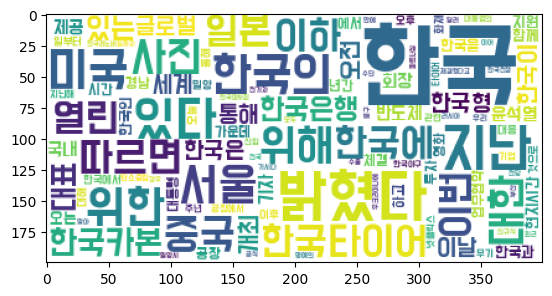

In [17]:
wc = WordCloud(font_path = "BMDOHYEON_ttf.ttf",
               background_color = 'white')
# 워크 클라우드 가져오기 wc = WordCloud(font_path= "", background_color="".mask="")

cloud = wc.generate_from_frequencies(dic) 
# wc.generate_from_frequencies(dic) >> dic:빈도분석한 딕셔너리
plt.imshow(cloud)

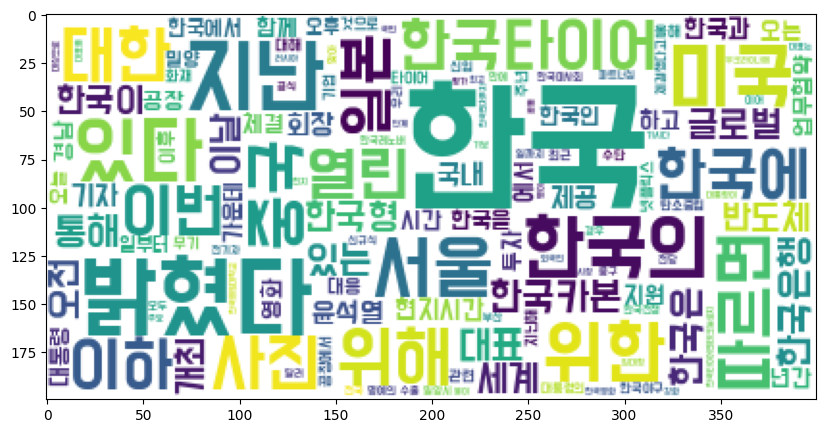

In [27]:
wc = WordCloud(font_path = "BMDOHYEON_ttf.ttf",
               background_color = 'white')

plt.figure(figsize= (10,5)) 
# 워드클라우드의 사이즈 크기 키우기 
# figure(figsize= (10,5))// figure: 도화지/ figsize= (10,5) :가로 10 세로 5

cloud = wc.generate_from_frequencies(dic) 
plt.imshow(cloud)

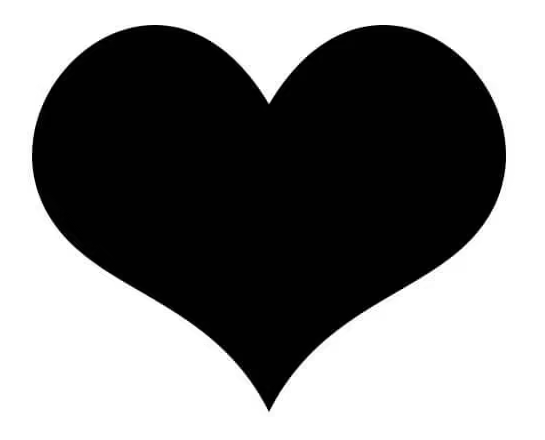

In [23]:
# 하트 이미지를 씌워보기
# 하트 이미지 가져오기
img = Image.open("하트.png")
img

In [28]:
# 이미지 행렬화 하기
img = Image.open("하트.png")
img = np.array(img) # np :numpy(넘파이).array() : ()안의 것을 행렬로 바꿔라
img
# 수치로 변환해야 잘 씌워짐
# 배경이 흰색에 가까울수록 255, 검은색에 가까울 수록 0
# 수치로 변환하고 나서 mask에 씌우면 됨

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

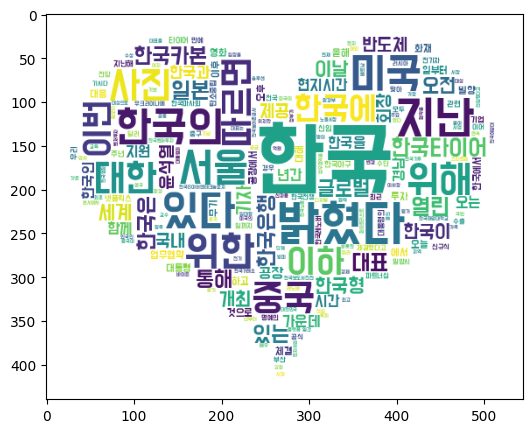

In [30]:
wc = WordCloud(font_path = "BMDOHYEON_ttf.ttf",
               background_color = 'white', mask=img) 
# mask에 행렬화 시킨 img 넣음 >> 이미지 덮어씌움

plt.figure(figsize= (10,5)) 
cloud = wc.generate_from_frequencies(dic) 
plt.imshow(cloud)
# 해당 이미지 오른쪽 클릭해서 이미지 저장도 가능